# Vérification de la conduction thermique instationnaire

In [1]:
from trustutils import run

run.introduction("D.Jamet","13/04/2021")
run.description("On considère un problème de conduction thermique instationnaire. On compare la solution obtenue par GENEPI à la solution analytique. La température est imposée en entrée et sortie du domaine (cf. jeu de données). On compare le profil de température dans la direction 𝑥 ainsi que le champ de température bidimensionnel. On compare également les flux conductifs sur les parois en entrée et sortie.")
run.TRUST_parameters()

## Introduction 
 Validation made by : D.Jamet



 Report created : 13/04/2021



 Report generated 25/01/2022

### Description 
On considère un problème de conduction thermique instationnaire. On compare la solution obtenue par GENEPI à la solution analytique. La température est imposée en entrée et sortie du domaine (cf. jeu de données). On compare le profil de température dans la direction 𝑥 ainsi que le champ de température bidimensionnel. On compare également les flux conductifs sur les parois en entrée et sortie.

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/EF/EF_Conduc_instat/build)

In [2]:
from trustutils import run
c1 = run.addCase(".","conduc_genepi_instat.data")
run.printCases()
run.runCases( )

### Test cases 
* ./conduc_genepi_instat.data : 


Running **with Sserver**...
  => A total of 1 cases were (successfully) run in 5.9s.


## Champs de température
On compare les champs de température calculé par GENEPI et analytique.  Cette comparaison se fait sur un profil en $y=cte$ et sur le champ 2D.

### Comparaison des profils calculé et analytique

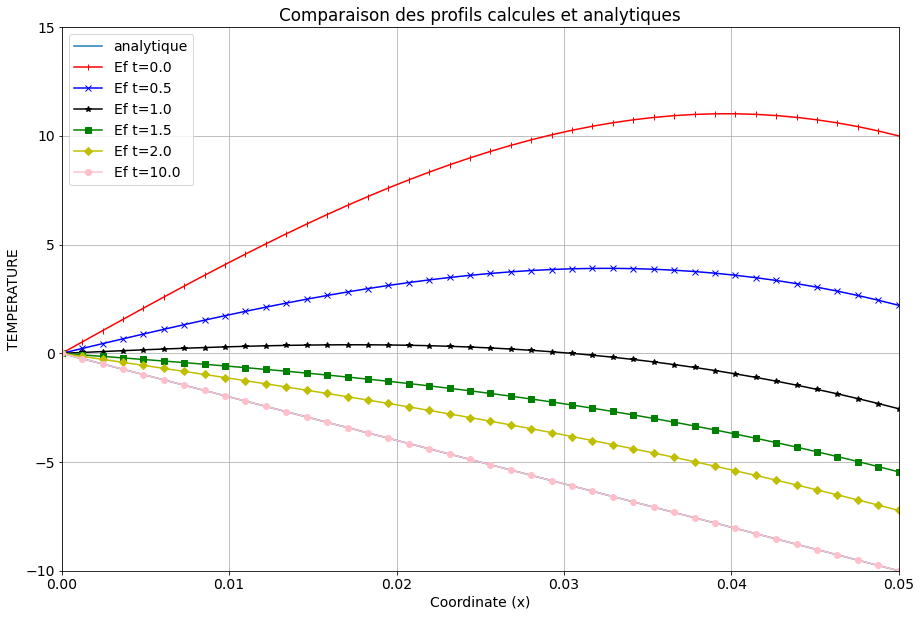

In [3]:
from trustutils.jupyter import plot 
import numpy as np

a=plot.Graph("Comparaison des profils calcules et analytiques",size=[15,10])
data = plot.loadText("ref_values.dat",skiprows=418)
a.add(data[0],data[1],label='analytique')
a.addSegment("./conduc_genepi_instat_TEMPERATURE_X.son",param="Time",value=0.0,label="Ef t=0.0",marker='r-|')   
a.addSegment("./conduc_genepi_instat_TEMPERATURE_X.son",param="Time",value=0.5,label="Ef t=0.5",marker='b-x')  
a.addSegment("./conduc_genepi_instat_TEMPERATURE_X.son",param="Time",value=1.0,label="Ef t=1.0",marker='k-*') 
a.addSegment("./conduc_genepi_instat_TEMPERATURE_X.son",param="Time",value=1.5,label="Ef t=1.5",marker='g-s') 
a.addSegment("./conduc_genepi_instat_TEMPERATURE_X.son",param="Time",value=2.0,label="Ef t=2.0",marker='y-D') 
a.addSegment("./conduc_genepi_instat_TEMPERATURE_X.son",param="Time",value=10.0,label="Ef t=10.0",marker='-o',color='pink') 
a.visu(0,0.05,-10,15)


### Champ de température à $t=0.5$
On trace le champ d'écart entre la température calculée et la solution analytique.  La solution analytique est représentée par des isovaleurs du champ de température.

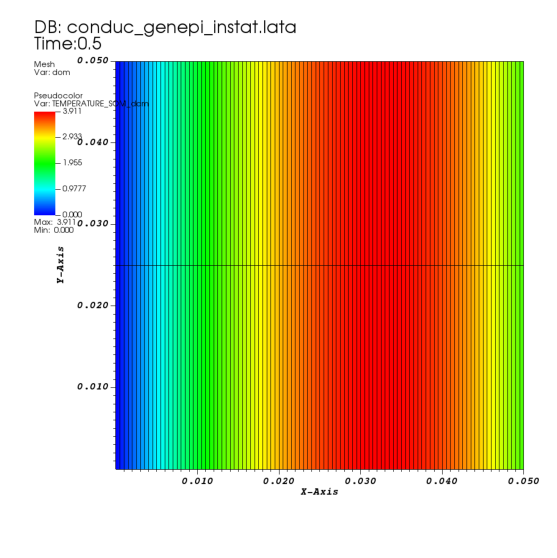

In [4]:
from trustutils import visit 
Plot=visit.showField("./conduc_genepi_instat.lata","Pseudocolor","TEMPERATURE_SOM_dom",time=1) 

## Flux conductifs aux frontières du domaine
Les flux conductifs calculés par GENEPI en $x=0$ et $x=L$ sont comparés aux flux théoriques.  L'erreur correspondante est également donnée.

### Comparaison théorie/numérique

In [5]:
from trustutils.jupyter import plot
import numpy as np
#A refaire

columns=["flux gauche",'flux droit']
Table=plot.Table(columns)  
ref=[5.,-5.]
Table.addLigne([ref],"theorie")
data=plot.loadText("./conduc_genepi_instat_fin.out")
Table.addLigne([data[[1,4]]],"calcul") 
error=[int((ref[0]-data[1])*10000)/(100.*ref[0]),int((ref[1]-data[4])*10000)/(100*ref[1])]
Table.addLigne([error],"error en %") 
Table.df 

,flux gauche,flux droit
theorie,5.000000,-5.0
calcul,4.999188,-5.0
error en %,0.016000,-0.0


### Comparaison des profils calculé et analytique

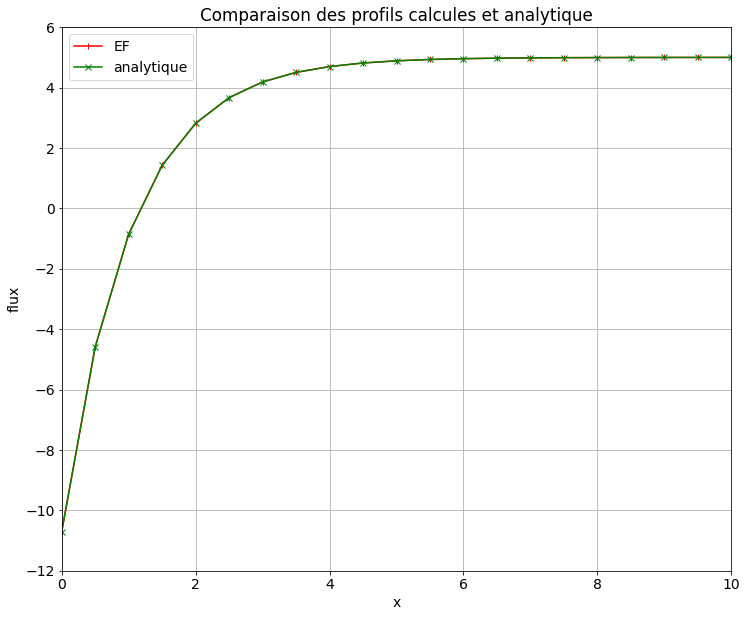

In [6]:
from trustutils import plot

a = plot.Graph("Comparaison des profils calcules et analytique")

x=plot.loadText("./conduc_genepi_instat_pb_Diffusion_chaleur.out")
a.add(x[0],x[1],marker="-|",label="EF",color='r')   


x=plot.loadText("./conduc_genepi_instat_pb_Diffusion_chaleur.out")
a.add(x[0],x[1],marker="-x",label="analytique",color='g')   

a.label("x","flux")
a.visu(0,10,-12,6)

## Data Files
### conduc_genepi_instat

In [7]:
from trustutils import run 
run.dumpDataset("./conduc_genepi_instat.data") 

 # Conduction 2D #
 # Terme source volumique lineaire #
 # Temperature imposee en entree et en sortie #
 # Symetrie sur les parois laterales #
 
 # PARALLEL OK 8 #
 dimension 2
 
 Pb_conduction pb
 Domaine dom
 # BEGIN MESH #
 Mailler dom
 {
 	 Pave Cavite 
  	 {
 	 	 Origine 0. 0.
 	 	 Nombre_de_Noeuds 101 3 
 	 	 Longueurs 0.05 0.05
 	 }
 	 {
 	 	 Bord Gauche X = 0.   0. <= Y <= 0.05
 	 	 Bord Haut   Y = 0.05 0. <= X <= 0.05
 	 	 Bord Bas    Y = 0.   0. <= X <= 0.05
 	 	 Bord Droit  X = 0.05 0. <= Y <= 0.05
 	 }
 } 
 
 # END MESH #
 # BEGIN PARTITION
 Partition dom
 {
 	 Partition_tool tranche { tranches 2 1 }
 	 Larg_joint 1
 	 zones_name DOM
 }
 End
 END PARTITION #
 
 # BEGIN SCATTER
 Scatter DOM.Zones dom
 END SCATTER #
 
 EF dis
 
 Scheme_euler_explicit sch
 Read sch
 {
 	 tinit 0.
 	 tmax  10.
 	 dt_min 0.00001
 	 dt_sauv 1000.
 	 dt_impr 0.5
 	 seuil_statio 1.e-8
 }
 
 Solide sol
 Read sol
 {
 	 rho Champ_Uniforme 1 0.5
 	 lambda Champ_Uniforme 1 0.5
 	 Cp Champ_Uniforme 1 100